# Assignment 1: Bloated real-estate market!

## Instructions to submit the assignment

- Please upload your solutions as a singple *ipynb* file on Canvas under Assignment 1.
- DO NOT remove output boxes while uploading the notebook.
- Your solution notebook must contain the python code that we can run to verify the answers.
- Upload your jupyter notebook on LumiNUS in the *Assignment 1 Submissions* folder. **The folder will close at 23:59 on 15/02/2023**. 
- Late submissions will receive a penalty on the grade as follows:
  - late within 1 hour: 10% reduction in grade
  - late within 6 hours: 30% reduction in grade
  - late within 12 hours: 50% reduction in grade
  - late within 1 day: 70% reduction in grade
  - after 1 day: zero mark

**This is an INDIVIDUAL ASSESSMENT. You must refrain from working in groups!**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Question 1: Loading the data

With more than 1 million flats spread across 24 towns and 3 estates, the Singapore brand of public housing is uniquely different. The flats spell home for over 80% of Singapore's resident population, of which, about 90% own their home. 

Data.gov is a repository of many datasets that are made available by different public service bodies in Singapore. In this assignment we will work on [HDB Resale Price](https://data.gov.sg/dataset/resale-flat-prices) available through the same datastore. It houses the resale price data from January 1990 to December 2020 on a monthly basis. We will be working on the resale records from 2000 to 2020.

Let's start exploring this dataset.

We have downloaded the dataset for you. It is available in *Assignment_1* under files in the LumiNUS. Uncompress the file in your working directory. You will see that it comprises of multiple CSV files. Please perform following tasks:

- Create a single dataframe in `pandas` by reading and appending all CSV files that have names `resale*`. 
- Print the total number of HDB resales records.

<div align="right"> (1 point) </div>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/IT5006/Assignment1/resale-flat-prices-based-on-approval-date-1990-1999.csv")
df = df.append(pd.read_csv("/content/drive/MyDrive/IT5006/Assignment1/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv"))
df = df.append(pd.read_csv("/content/drive/MyDrive/IT5006/Assignment1/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv"))
df = df.append(pd.read_csv("/content/drive/MyDrive/IT5006/Assignment1/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv"))
df = df.append(pd.read_csv("/content/drive/MyDrive/IT5006/Assignment1/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"))

print(len(df))

891721


## Question 2: Data Imputation

Print the count of missing values in every column of the dataframe.
<div align="right"> (1 point) </div>

In [4]:
print(df.isnull().sum(axis=0))

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64


We observe that the `remaining_lease` feature has multiple missing values. Impute the missing values and ensure that the dataframe does not contain any missing value.

*Hint: What is the lease period of every HDB flat in Singapore? [ Find out here.](https://www.gov.sg/article/do-i-really-own-my-hdb-flat)*
<div align="right"> (1 point) </div>

In [5]:
df['remaining_lease'] = 99 - (df['month'].str[0:4].astype('int') - df['lease_commence_date'])
print(df.isnull().sum(axis=0))

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64


Create a new feature `price_per_sqm` that lists the price per square meter of the resale record.

<div align="right">(1 point)</div>

In [6]:
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

## Question 3: Data Visualisation

Create four different data panels from the original dataframe.
- First panel contains the records from January 2018 to December 2018
- Second panel contains the records from January 2019 to December 2019
- Third panel contains the records from January 2020 to December 2020
- Fourth panel contains the records from January 2021 to December 2021

In order to do so, create a column `panel` that contains the panel number for every datapoint
<div align="right"> (1 point) </div>

In [7]:
df['panel'] = 0
df.loc[(df['month'].str[0:4].astype('int')==2018), 'panel'] = 1
df.loc[(df['month'].str[0:4].astype('int')==2019), 'panel'] = 2
df.loc[(df['month'].str[0:4].astype('int')==2020), 'panel'] = 3
df.loc[(df['month'].str[0:4].astype('int')==2021), 'panel'] = 4

For every panel, show a lineplot of resale prices versus the time, colour-coded by `flat_type`. Only include *5 ROOM, 4 ROOM, 3 ROOM, 2 ROOM, 1 ROOM* types in the lineplot.  Please ensure following things: 
- Four plots must be in one row with the leftmost plot displaying the first panel and the rightmost displaying the fourth panel.
- All plots must share the same range of resale prices on their `y` axes.
- Colour coding for the `flat_type` must be consistent across the panels.
- The entire plot should have the title: "Resale Prices of Different Flat Types"

<div align="right"> (4 points) </div>

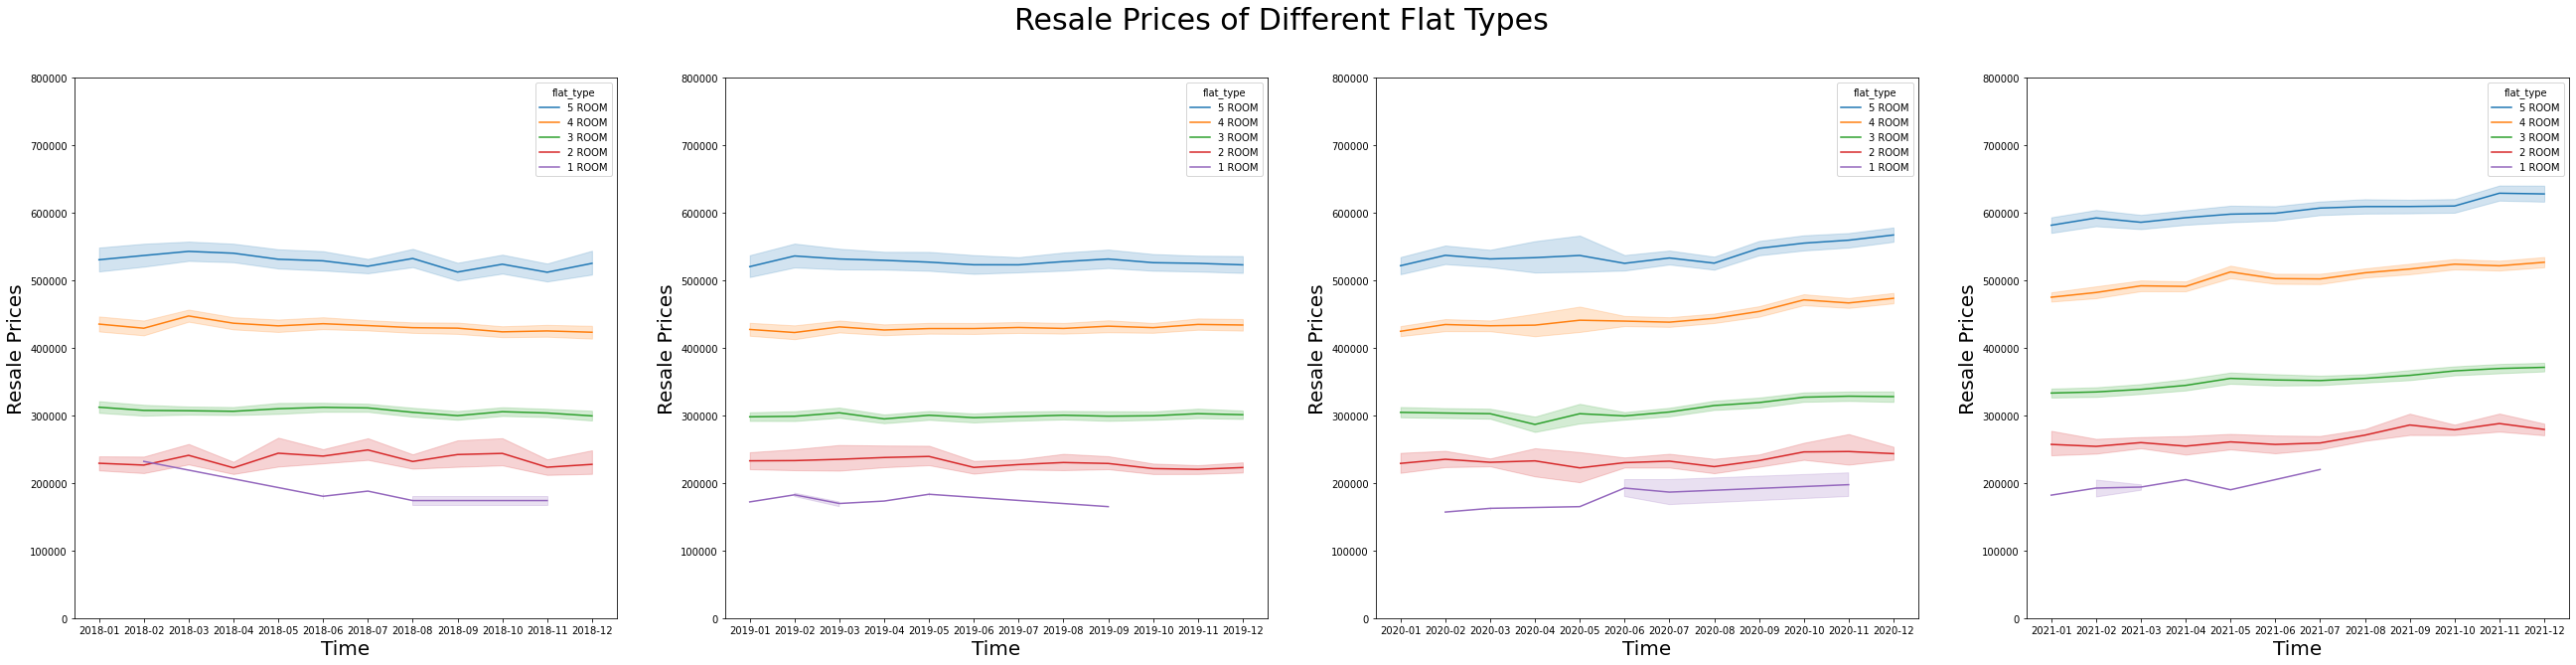

In [8]:
plt.figure(figsize=(45,10))
plt.suptitle('Resale Prices of Different Flat Types', fontsize=30)


plt.subplot(141)
sns.lineplot(data=df[df['panel'] == 1], x='month', y='resale_price', hue='flat_type', hue_order=['5 ROOM','4 ROOM','3 ROOM','2 ROOM','1 ROOM'])
plt.ylim(0, 800000)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Resale Prices',fontsize=20)
plt.tick_params(labelsize=10)



plt.subplot(142)
sns.lineplot(data=df[df['panel'] == 2], x='month', y='resale_price', hue='flat_type', hue_order=['5 ROOM','4 ROOM','3 ROOM','2 ROOM','1 ROOM'])
plt.ylim(0, 800000)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Resale Prices',fontsize=20)
plt.tick_params(labelsize=10)

plt.subplot(143)
sns.lineplot(data=df[df['panel'] == 3], x='month', y='resale_price', hue='flat_type', hue_order=['5 ROOM','4 ROOM','3 ROOM','2 ROOM','1 ROOM'])
plt.ylim(0, 800000)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Resale Prices',fontsize=20)
plt.tick_params(labelsize=10)

plt.subplot(144)
sns.lineplot(data=df[df['panel'] == 4], x='month', y='resale_price', hue='flat_type', hue_order=['5 ROOM','4 ROOM','3 ROOM','2 ROOM','1 ROOM'])
plt.ylim(0, 800000)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Resale Prices',fontsize=20)
plt.tick_params(labelsize=10)

plt.show()

# Question 3: Bootstrap and Confidence Intervals

In Week 2, we learnt the role of statistics connecting the observation on samples to their estimates on the population. Let's us create a simulation of the experiment and validate the central limit theorem.

We will treat `df` as the population and take *bootstrap samples* (of size 100 datapoints each) from it. Please write code that does the following.
- Generates 1000 bootstrap samples.
- Compute sample mean for `price_per_sqm` for every sample.
- Plot a histogram of mean (does it not look like a normal distribution!)

<div align="right"> (3 points) </div>

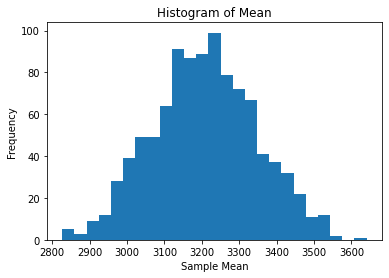

In [9]:
sample_means = []

for i in range(1000):
    bootstrap_samples = df.sample(100)
    sample_mean = bootstrap_samples['price_per_sqm'].mean()
    sample_means.append(sample_mean)


plt.hist(sample_means, bins=25)

plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Mean')

plt.show()

Generate 95% confidence interval for the (population) mean of `price_per_sqm` using the bootstrap samples.
<div align="right"> (2 points) </div>

In [10]:
interval = st.t.interval(0.95, df=len(sample_means)-1, loc=np.mean(sample_means), scale=st.sem(sample_means))
interval

(3200.1548815510005, 3217.311478562441)

Does the population mean lie inside it?

<div align="right">(1 point)</div>

In [11]:
df['price_per_sqm'].mean()

3204.432630472826

Answer: Yes, the population mean is 3204.43, which lies inside the  95% confidence interval

## Question 4: Growing Resale Prices!

In 2019, the rental cost of a 3BR HDB in Clementi used to be around 2500 dollars, and now it has reached as high as 4100. dollars. Some analysis shows that it is caused due to COVID. Well, we are not sure about that yet!

Is it true about the resale prices as well? Is there some correlation? Let's analyse the growth of various areas in Singapore.

- Compute the *median* `price_per_sqm` of houses in various areas in 2019 and 2022.
- We define *growth* as the normalised difference between the median housing `price_per_sqm` in 2019 and 2022, i.e. *(price_per_sqm_2022 - price_per_sqm_2019) / price_per_sqm_2019*. Compute `growth` of various areas in Singapore.
- Create a dataframe that contains four columns: `town`, `2019_median`, `2022_median` and `growth`. Print the dataframe sorted in descending order of the growth.



<div align="right"> (3 points) </div>

In [12]:
df_2019 = df[df['month'].str[0:4].astype('int') == 2019].groupby('town')
df_2019 = df_2019['price_per_sqm'].median()
df_2019 = df_2019.reset_index()
df_2019 = df_2019.rename(columns={'price_per_sqm': '2019_median'})

df_2022 = df[df['month'].str[0:4].astype('int') == 2022].groupby('town')
df_2022 = df_2022['price_per_sqm'].median()
df_2022 = df_2022.reset_index()
df_2022 = df_2022.rename(columns={'price_per_sqm': '2022_median'})

df_overall = pd.merge(df_2019, df_2022, on='town')
df_overall['growth'] = (df_overall['2022_median'] - df_overall['2019_median']) / df_overall['2019_median']
df_overall = df_overall.sort_values(by='growth', ascending=False)
df_overall = df_overall.reset_index(drop=True)

df_overall

,town,2019_median,2022_median,growth
0,CHOA CHU KANG,3367.934426,4888.888889,0.451599
1,SEMBAWANG,3664.122137,5284.050179,0.442105
2,WOODLANDS,3445.799060,4779.411765,0.387026
3,BUKIT BATOK,3750.000000,5130.156318,0.368042
4,YISHUN,3838.121118,5140.186916,0.339246
5,KALLANG/WHAMPOA,5283.882784,7000.000000,0.324783
6,JURONG WEST,3719.008264,4864.864865,0.308108
7,ANG MO KIO,4117.647059,5328.911501,0.294164
8,HOUGANG,4047.619048,5238.095238,0.294118
9,TOA PAYOH,4444.444444,5692.307692,0.280769


Do some research to qualitatively reason why COVID might have caused this surge in resale prices. Please provide two reasons for the same.
<div align="right"> (2 point) </div>

1. People work at home during COVID period, so they spend more time at their house. The demand for house increases, which result in growth of resale prices.

2. The COVID has depressed the economy, so people are investing more conservatively. Many people get the money invested in stocks back and bought houses which are fixed assets. This also increases the demand for houses, which result in growth of resale prices.